### 直观理解高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(-4,5,1)

In [5]:
y = np.array((X>=-2) & (X<=2),dtype='int')

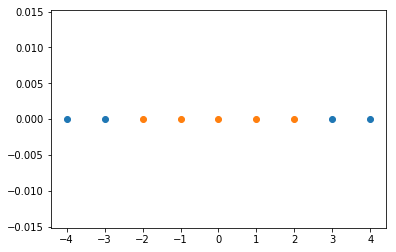

In [37]:
plt.scatter(X[y==0],[0]*len(X[y==0]))
plt.scatter(X[y==1],[0]*len(X[y==1]))

In [38]:
def gaussian(x,l):
    gamma = 1.0
    return np.exp(-gamma*(x-1)**2)

In [39]:
l1,l2 = -1,1
X_new = np.empty((len(X),2))

In [40]:
X_new

array([[1.38879439e-11, 1.38879439e-11],
       [1.12535175e-07, 1.12535175e-07],
       [1.23409804e-04, 1.23409804e-04],
       [1.83156389e-02, 1.83156389e-02],
       [3.67879441e-01, 3.67879441e-01],
       [1.00000000e+00, 1.00000000e+00],
       [3.67879441e-01, 3.67879441e-01],
       [1.83156389e-02, 1.83156389e-02],
       [1.23409804e-04, 1.23409804e-04]])

In [41]:
for i,data in enumerate(X):
    X_new[i,0] = gaussian(data,l1)
    X_new[i,1] = gaussian(data,l2)

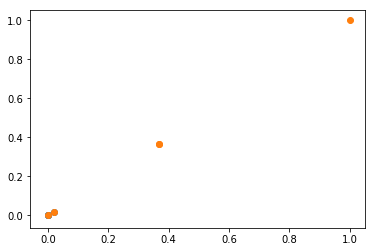

In [42]:
plt.scatter(X_new[y==0,0],X_new[y==0,1])
plt.scatter(X_new[y==1,0],X_new[y==1,1])
plt.show()

$$ 高斯核函数：K(x,y) = e^{-\gamma||x-y||^2}$$  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

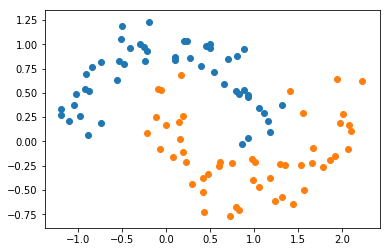

In [2]:
X,y = datasets.make_moons(noise=0.15,random_state=666) # 添加噪音
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [5]:
# 使用scklern中的高斯核
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [7]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("stand",StandardScaler()),
        ("svm",SVC(gamma=gamma,kernel='rbf'))
    ])

In [8]:
rbf = RBFKernelSVC(gamma=1.0)
rbf.fit(X,y)

Pipeline(memory=None,
     steps=[('stand', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [9]:
def plot_deciBiOn_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1),
    )
   
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    print(type(x0.ravel()))
    print(type(x0))
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF590","#90CAF9"])
    plt.contourf(x0,x1,zz,cmap=custom_cmap,linewidth=5)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


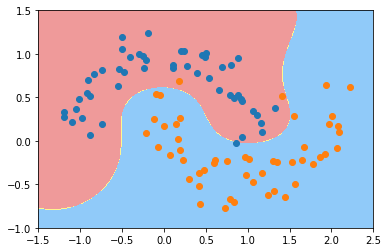

In [10]:
plot_deciBiOn_boundary(rbf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


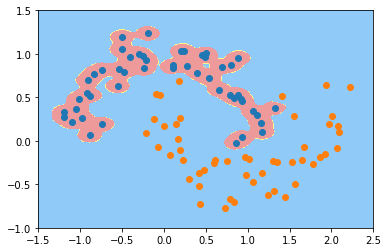

In [12]:
rbf_100 = RBFKernelSVC(gamma=100)
rbf_100.fit(X,y)
plot_deciBiOn_boundary(rbf_100,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


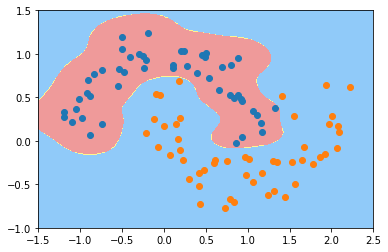

In [13]:
rbf_10 = RBFKernelSVC(gamma=10)
rbf_10.fit(X,y)
plot_deciBiOn_boundary(rbf_10,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

 ### SVM解决回归问题

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR,LinearSVR


In [18]:
data = datasets.load_boston()
X = data.data
y =data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [20]:
def StanderSVR(esplion=0.1):
    return Pipeline([
        ("stand",StandardScaler()),
        ("svr",LinearSVR(epsilon=esplion))
    ])

In [21]:
svr = StanderSVR()
svr.fit(X_train,y_train)
svr.score(X_test,y_test)

0.6355808757669785